In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy import stats
import random
import quspin
import os
import time
from math import comb

In [2]:
np.set_printoptions(suppress=True,precision=3)
from quspin.basis import spin_basis_1d
from quspin.operators import hamiltonian

In [3]:
def XXZHamiltonian(L,M,J_zz,J_ch): #returns hamiltonian in the standard basis
    basis = spin_basis_1d(L=L,Nup = M)
    op_list_xy = [[1/4,i,i+1]for i in range(0,L-1)]#integrable terms of the Hamiltonian
    op_list_zz = [[J_zz/4,i,i+1]for i in range(0,L-1)]

    if J_ch == 0:
        static = [["xx",op_list_xy],["yy",op_list_xy],["zz",op_list_zz]]

        H_XXZ = hamiltonian(static,[],basis = basis)
        return H_XXZ
    else:
        op_list_xy_NNN = [[J_ch/4,i,i+2]for i in range(0,L-2)]

        static = [["xx",op_list_xy],["yy",op_list_xy],["zz",op_list_zz],["xx",op_list_xy_NNN],["yy",op_list_xy_NNN]]

        H_XXZ_NNN = hamiltonian(static,[],basis = basis)
        return H_XXZ_NNN

In [5]:
#turning shannon finder into a function

def shannon(l,m):
    H_in = XXZHamiltonian(l,m,0.5,0)
    H_ch = XXZHamiltonian(l,m,0.5,1.0)

    int_eval,int_evect = H_in.eigh(0)
    ch_eval,ch_evect = H_ch.eigh(0)

    #Calculates the shanon entropy for eigenstates without time evolution
    int_shanons=[]
    ch_shanons=[]

    for int_psi,ch_psi in zip(int_evect,ch_evect):

        int_prob = int_psi*np.conjugate(int_psi)
        ch_prob = ch_psi*np.conjugate(ch_psi)

        # use the convention that 0*log(0) = 0 :/ this makes me sad
        #but l'hopital agrees with me so, so be it

        int_s = -1*np.sum([p * np.log(p) if p > 0 else 0 for p in int_prob])
        ch_s = -1*np.sum([p * np.log(p) if p > 0 else 0 for p in ch_prob])

        int_shanons.append(int_s)
        ch_shanons.append(ch_s)
    
    return int_shanons,ch_shanons, int_eval, ch_eval

In [ ]:
#the ls and ms you want to test it for
#we make the data type integers for the function

ls= [int(x) for x in np.arange(9,16) ]
ms= [ int(x) for x in np.sort(np.append(np.arange(5,9),np.arange(6,9))) ]

#getting the hilbert dimension size
dims= [comb(l,m) for l,m in zip(ls,ms)]



In [ ]:
#Dont run this unless youre only testing one chain or a short ones
#This does data analysis while running it, it does NOT save the results

times=[]

int_maxshan=[]
ch_maxshan=[]

int_avshan=[]
ch_avshan=[]

int_range=[]
ch_range=[]

int_var=[]
ch_var=[]

for l,m in zip(ls,ms):
    time1=time.time()
    
    int_shanons,ch_shanons, int_eval, ch_eval= shannon(l,m)
    
    totaltime=time.time()-time1

    times.append(totaltime)

    int_maxshan.append(max(int_shanons))
    ch_maxshan.append(max(ch_shanons))

    int_avshan.append((sum(int_shanons))/len(int_shanons))
    ch_avshan.append((sum(ch_shanons))/len(ch_shanons))

    int_range.append(min(int_shanons))
    ch_range.append(min(ch_shanons))

    int_var.append(np.var(int_shanons))
    ch_var.append(np.var(ch_shanons))


Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


/tmp/ipykernel_1041/358928364.py:16: RuntimeWarning: divide by zero encountered in log
  ch_s=-1*np.sum( (ch_psi*np.conjugate(ch_psi)) * np.log(ch_psi*np.conjugate(ch_psi)) )
/tmp/ipykernel_1041/358928364.py:16: RuntimeWarning: invalid value encountered in multiply
  ch_s=-1*np.sum( (ch_psi*np.conjugate(ch_psi)) * np.log(ch_psi*np.conjugate(ch_psi)) )


Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


/tmp/ipykernel_1041/358928364.py:15: RuntimeWarning: divide by zero encountered in log
  int_s=-1*np.sum( (int_psi*np.conjugate(int_psi)) * np.log(int_psi*np.conjugate(int_psi)) )
/tmp/ipykernel_1041/358928364.py:15: RuntimeWarning: invalid value encountered in multiply
  int_s=-1*np.sum( (int_psi*np.conjugate(int_psi)) * np.log(int_psi*np.conjugate(int_psi)) )


Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


In [7]:
#use this instead of the above code to save results


times=[]
os.system(f"mkdir CSV_Outputs/Shannon_Results")


for l,m in zip(ls,ms):
    os.system(f"mkdir CSV_Outputs/Shannon_Results/L{l}M{m}chain")
    os.system(f"mkdir CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient0.0")
    os.system(f"mkdir CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient1.0")

    time1=time.time()
    
    int_shanons,ch_shanons,int_eval,ch_eval = shannon(l,m)
    
    totaltime=time.time()-time1
    times.append(totaltime)

    np.savetxt( f"CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient0.0/int_shannonsL{l}M{m}.csv",int_shanons, delimiter=",")
    np.savetxt( f"CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient1.0/ch_shannonsL{l}M{m}.csv",ch_shanons, delimiter=",")

    np.savetxt( f"CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient0.0/int_evalL{l}M{m}.csv",int_eval, delimiter=",")
    np.savetxt( f"CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient1.0/ch_evalL{l}M{m}.csv",ch_eval, delimiter=",")


mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L9M5chain’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L9M5chain/chaos_coefficient0.0’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L9M5chain/chaos_coefficient1.0’: File exists


Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L10M6chain’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L10M6chain/chaos_coefficient0.0’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L10M6chain/chaos_coefficient1.0’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L11M6chain’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L11M6chain/chaos_coefficient0.0’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L11M6chain/chaos_coefficient1.0’: File exists


Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L12M7chain’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L12M7chain/chaos_coefficient0.0’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L12M7chain/chaos_coefficient1.0’: File exists


Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L13M7chain’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L13M7chain/chaos_coefficient0.0’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L13M7chain/chaos_coefficient1.0’: File exists


Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L14M8chain’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L14M8chain/chaos_coefficient0.0’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L14M8chain/chaos_coefficient1.0’: File exists


Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L15M8chain’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L15M8chain/chaos_coefficient0.0’: File exists
mkdir: cannot create directory ‘CSV_Outputs/Shannon_Results/L15M8chain/chaos_coefficient1.0’: File exists


Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


In [8]:
#data analysis here

int_maxshan=[]
ch_maxshan=[]

int_avshan=[]
ch_avshan=[]

int_minshan=[]
ch_minshan=[]

int_var=[]
ch_var=[]

for l,m in zip(ls,ms):
    int_shanons= np.loadtxt(f"CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient0.0/int_shannonsL{l}M{m}.csv",dtype=complex)
    ch_shanons= np.loadtxt(f"CSV_Outputs/Shannon_Results/L{l}M{m}chain/chaos_coefficient1.0/ch_shannonsL{l}M{m}.csv",dtype=complex)

    int_maxshan.append(max(int_shanons))
    ch_maxshan.append(max(ch_shanons))

    int_avshan.append((sum(int_shanons))/len(int_shanons))
    ch_avshan.append((sum(ch_shanons))/len(ch_shanons))

    int_minshan.append(min(int_shanons))
    ch_minshan.append(min(ch_shanons))

    int_var.append(np.var(int_shanons))
    ch_var.append(np.var(ch_shanons))

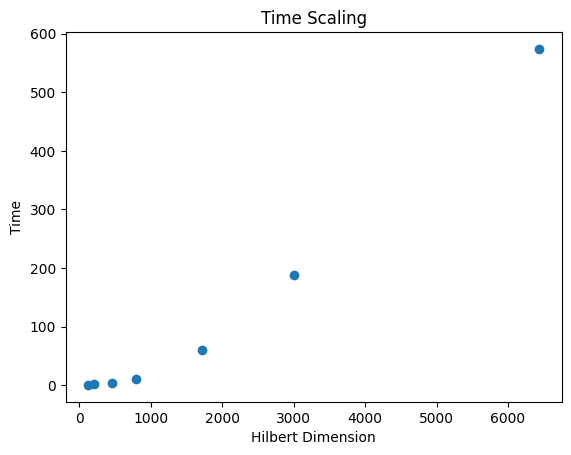

In [ ]:
'''
np.savetxt("times.csv",times,delimiter=",")
plt.title("Time Scaling")
plt.ylabel("Time")
plt.xlabel("Hilbert Dimension")
plt.plot(dims,times, "o")
plt.savefig("Shannontime.pdf")
'''

/var/data/python/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/var/data/python/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


[np.complex128(4.047000259500749+0j), np.complex128(4.505912918272767+0j), np.complex128(5.22257563411834+0j), np.complex128(5.727997270655107+0j), np.complex128(6.435004201915204+0j), np.complex128(6.9607807402019395+0j), np.complex128(7.679961771460998+0j)]
[np.complex128(4.036892551438094+0j), np.complex128(4.529868649546042+0j), np.complex128(5.320661239070614+0j), np.complex128(5.87467988599181+0j), np.complex128(6.644194867472421+0j), np.complex128(7.208545516307736+0j), np.complex128(7.977948181727093+0j)]


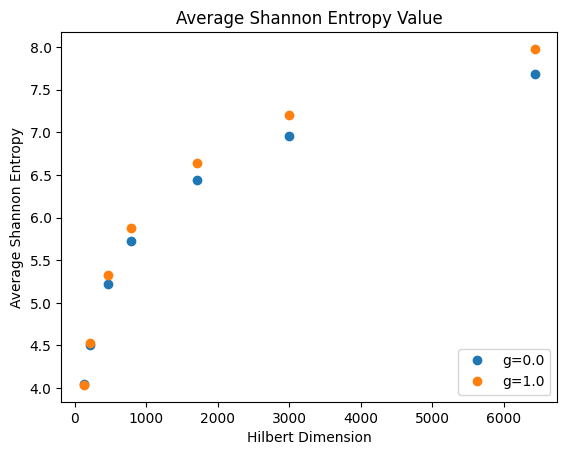

In [15]:
plt.title("Average Shannon Entropy Value")
plt.ylabel("Average Shannon Entropy")
plt.xlabel("Hilbert Dimension")
plt.plot(dims,int_avshan,"o",label="g=0.0")
print(int_avshan)
#getting none type values
#but it is the shape we want :))))
plt.plot(dims,ch_avshan,"o",label="g=1.0")
#plt.plot(ch_avshan,"o")
print(ch_avshan)
#way more none types for chaotic case
plt.legend(markerscale=1,loc='lower right')
plt.savefig("ShannonAverage.pdf")


[np.complex128(4.340658369778833-0j), np.complex128(4.776845536273359-0j), np.complex128(5.5123613898626935-0j), np.complex128(6.043406935349116-0j), np.complex128(6.762897499589558-0j), np.complex128(7.271154211012422-0j), np.complex128(8.014830825456215-0j)]
[np.complex128(4.305358173481788-0j), np.complex128(4.7252300310958235-0j), np.complex128(5.558777940935217-0j), np.complex128(6.039981436734397-0j), np.complex128(6.759316375178436-0j), np.complex128(7.328035688748507-0j), np.complex128(8.06664326448314-0j)]


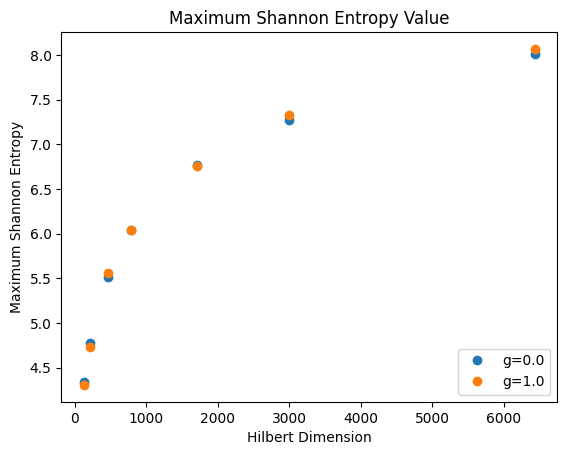

In [10]:
plt.title("Maximum Shannon Entropy Value")
plt.ylabel("Maximum Shannon Entropy")
plt.xlabel("Hilbert Dimension")
plt.plot(dims,int_maxshan,"o",label="g=0.0")
print(int_maxshan)
#still a none type for L14M8 as maximum which doesnt really make sense

plt.plot(dims,ch_maxshan,"o",label="g=1.0")
print(ch_maxshan)
#no none types for some reason
plt.legend(markerscale=1,loc='lower right')


[np.float64(0.03916914887608116), np.float64(0.03922586672226717), np.float64(0.018761730818058212), np.float64(0.007480756288668231), np.float64(0.011858702053542903), np.float64(0.01075752960381851), np.float64(0.007080064624471393)]


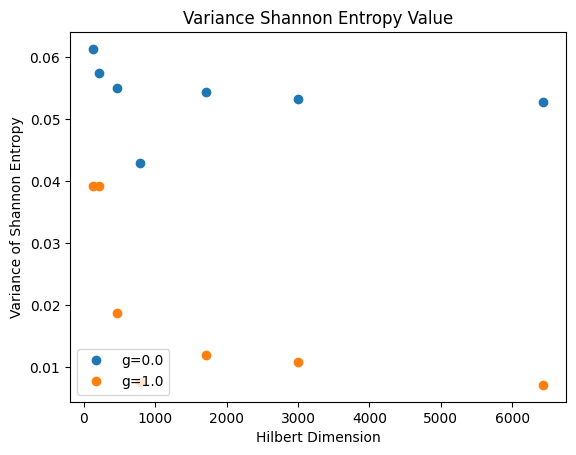

In [16]:
plt.title("Variance Shannon Entropy Value")
plt.ylabel("Variance of Shannon Entropy")
plt.xlabel("Hilbert Dimension")
plt.plot(dims,int_var,"o",label="g=0.0")
plt.plot(dims,ch_var,"o",label="g=1.0")

plt.legend(markerscale=1,loc='lower left')
print(ch_var)
#the none types make this pretty much unusable
plt.savefig("ShannonVariance.pdf")


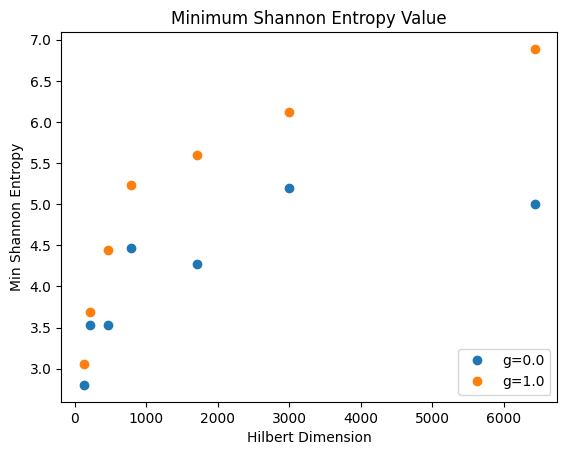

In [13]:
plt.title("Minimum Shannon Entropy Value")
plt.ylabel("Min Shannon Entropy")
plt.xlabel("Hilbert Dimension")
plt.plot(dims,int_minshan,"o",label="g=0.0")
plt.plot(dims,ch_minshan,"o",label="g=1.0")

plt.legend(markerscale=1,loc='lower right')


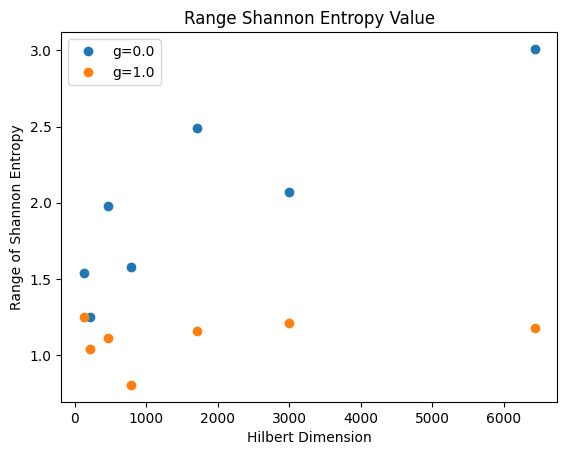

In [14]:
int_range=np.array(int_maxshan)-np.array(int_minshan)
ch_range=np.array(ch_maxshan)-np.array(ch_minshan)

plt.title("Range Shannon Entropy Value")
plt.ylabel("Range of Shannon Entropy")
plt.xlabel("Hilbert Dimension")
plt.plot(dims,int_range,"o",label="g=0.0")
plt.plot(dims,ch_range,"o",label="g=1.0")

plt.legend(markerscale=1,loc='upper left')
#still missing values